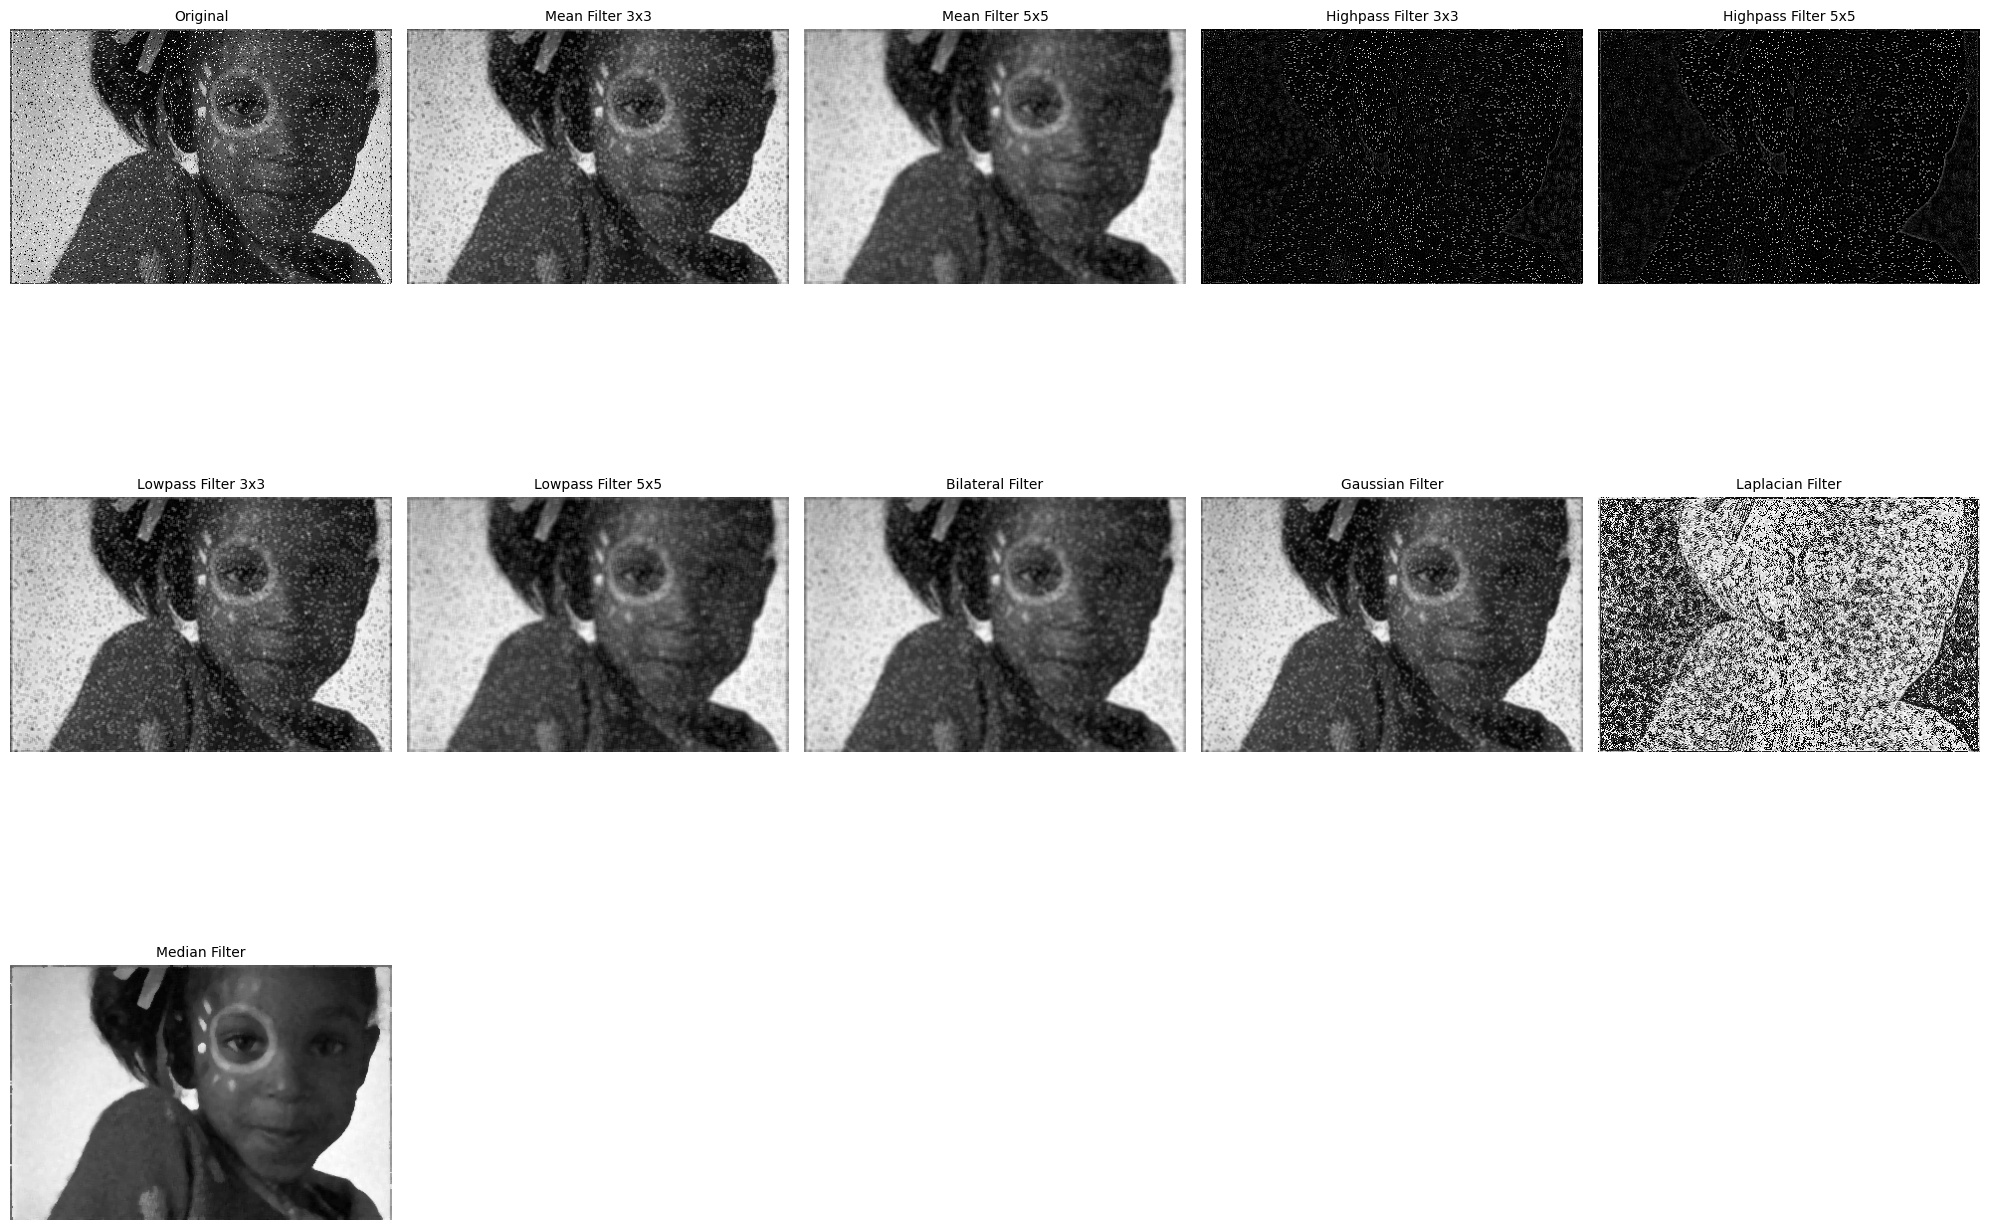

In [2]:
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter, median_filter

# Load a noisy image
image = cv2.imread("/content/Sample image.jpg", cv2.IMREAD_GRAYSCALE)

# Manual mean filtering
def mean_filter(image, mask_size):
    padded_image = np.pad(image, mask_size // 2, mode='reflect')
    filtered_image = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + mask_size, j:j + mask_size]
            filtered_image[i, j] = np.mean(region)

    return filtered_image.astype(np.uint8)

# Manual highpass filter (edge detection)
def highpass_filter(image, mask_size):
    mean_filtered = mean_filter(image, mask_size)
    highpass = image.astype(np.float32) - mean_filtered
    return np.clip(highpass, 0, 255).astype(np.uint8)

# Manual lowpass filter
def lowpass_filter(image, mask_size):
    return mean_filter(image, mask_size)

# Bilateral filter (manual approximation)
def bilateral_filter(image, mask_size, sigma_d, sigma_r):
    padded_image = np.pad(image, mask_size // 2, mode='reflect')
    filtered_image = np.zeros_like(image, dtype=np.float32)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + mask_size, j:j + mask_size]
            center_value = image[i, j]

            spatial_weight = np.exp(-((np.arange(mask_size) - mask_size // 2)[:, None] ** 2 +
                                       (np.arange(mask_size) - mask_size // 2)[None, :] ** 2) / (2 * sigma_d ** 2))
            intensity_weight = np.exp(-(region - center_value) ** 2 / (2 * sigma_r ** 2))

            weight = spatial_weight * intensity_weight
            filtered_image[i, j] = np.sum(region * weight) / np.sum(weight)

    return filtered_image.astype(np.uint8)

# Gaussian filter
def gaussian_filter_manual(image, mask_size, sigma):
    padded_image = np.pad(image, mask_size // 2, mode='reflect')
    filtered_image = np.zeros_like(image, dtype=np.float32)

    kernel = np.exp(-((np.arange(mask_size) - mask_size // 2)[:, None] ** 2 +
                      (np.arange(mask_size) - mask_size // 2)[None, :] ** 2) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + mask_size, j:j + mask_size]
            filtered_image[i, j] = np.sum(region * kernel)

    return filtered_image.astype(np.uint8)

# Laplacian filter
def laplacian_filter(image, mask_size, sigma):
    gaussian = gaussian_filter_manual(image, mask_size, sigma)
    laplacian = image - gaussian
    return np.clip(laplacian, 0, 255).astype(np.uint8)

# Median filter
def median_filter_manual(image, mask_size):
    padded_image = np.pad(image, mask_size // 2, mode='reflect')
    filtered_image = np.zeros_like(image, dtype=np.uint8)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + mask_size, j:j + mask_size]
            filtered_image[i, j] = np.median(region)

    return filtered_image

# Applying filters
mean_filtered_3x3 = mean_filter(image, 3)
mean_filtered_5x5 = mean_filter(image, 5)
highpass_filtered_3x3 = highpass_filter(image, 3)
highpass_filtered_5x5 = highpass_filter(image, 5)
lowpass_filtered_3x3 = lowpass_filter(image, 3)
lowpass_filtered_5x5 = lowpass_filter(image, 5)
bilateral_filtered = bilateral_filter(image, 5, sigma_d=2, sigma_r=30)
gaussian_filtered = gaussian_filter_manual(image, 5, sigma=1)
laplacian_filtered = laplacian_filter(image, 5, sigma=1)
median_filtered = median_filter_manual(image, 5)

import matplotlib.pyplot as plt

# Titles for the filters
titles = [
    "Original",
    "Mean Filter 3x3",
    "Mean Filter 5x5",
    "Highpass Filter 3x3",
    "Highpass Filter 5x5",
    "Lowpass Filter 3x3",
    "Lowpass Filter 5x5",
    "Bilateral Filter",
    "Gaussian Filter",
    "Laplacian Filter",
    "Median Filter"
]

# Corresponding images
images = [
    image,
    mean_filtered_3x3,
    mean_filtered_5x5,
    highpass_filtered_3x3,
    highpass_filtered_5x5,
    lowpass_filtered_3x3,
    lowpass_filtered_5x5,
    bilateral_filtered,
    gaussian_filtered,
    laplacian_filtered,
    median_filtered
]

# Set the number of images per row
images_per_row = 5
rows = len(images) // images_per_row + (len(images) % images_per_row != 0)

# Adjust figure size for larger images
plt.figure(figsize=(20, 5 * rows))

# Plot each image
for i in range(len(images)):
    plt.subplot(rows, images_per_row, i + 1)
    plt.imshow(images[i], cmap='gray')  # Grayscale images, no need for color conversion
    plt.title(titles[i], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()



cv2.waitKey(0)
cv2.destroyAllWindows()


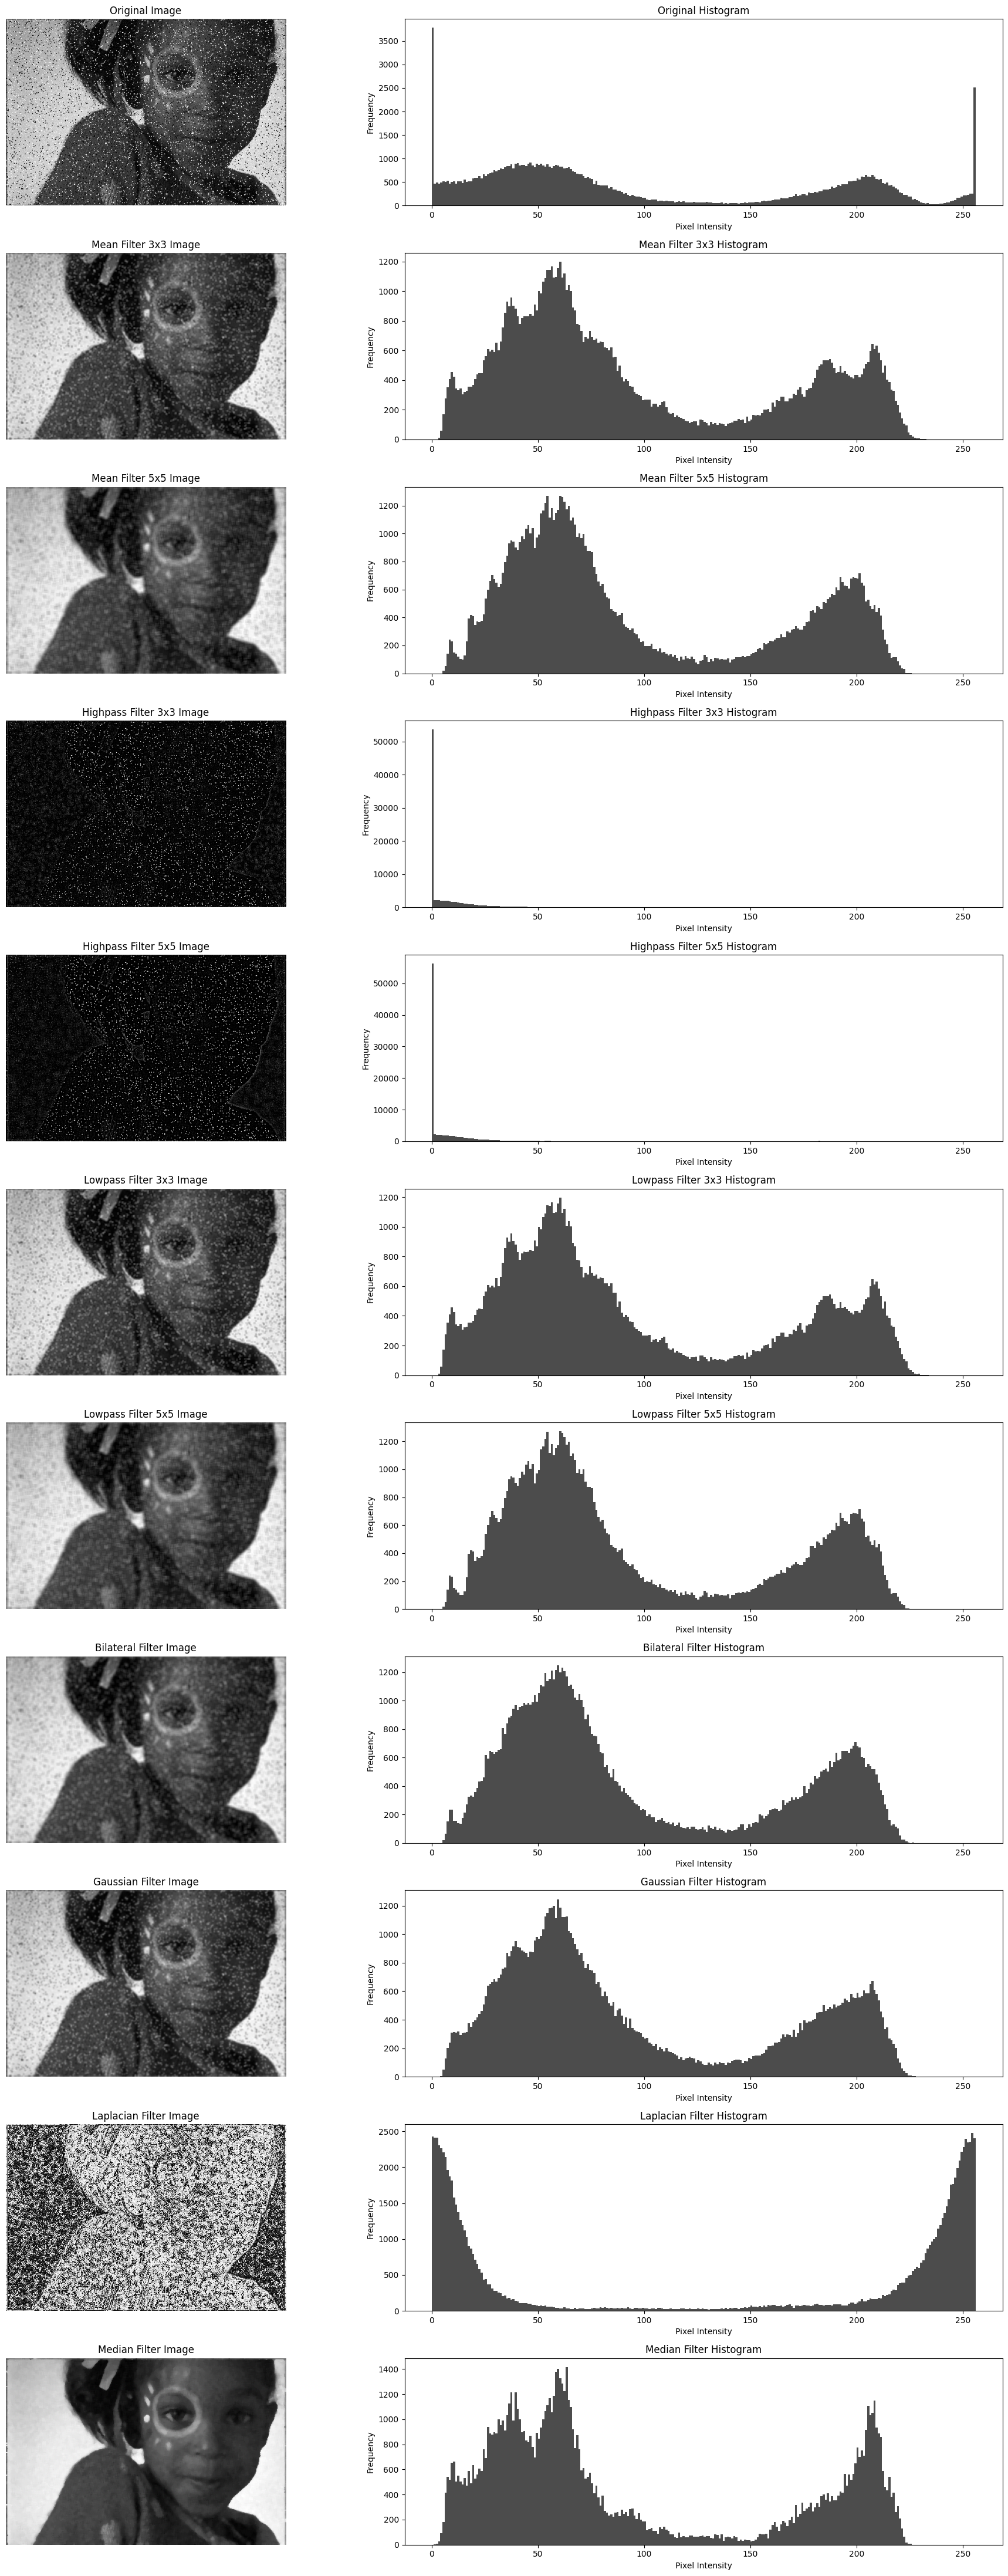

In [ ]:
import matplotlib.pyplot as plt

# Function to compute and display histograms
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black', alpha=0.7)
    plt.title(title)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.grid(False)

# Display images and histograms for comparison
filters = [
    ("Original", image),
    ("Mean Filter 3x3", mean_filtered_3x3),
    ("Mean Filter 5x5", mean_filtered_5x5),
    ("Highpass Filter 3x3", highpass_filtered_3x3),
    ("Highpass Filter 5x5", highpass_filtered_5x5),
    ("Lowpass Filter 3x3", lowpass_filtered_3x3),
    ("Lowpass Filter 5x5", lowpass_filtered_5x5),
    ("Bilateral Filter", bilateral_filtered),
    ("Gaussian Filter", gaussian_filtered),
    ("Laplacian Filter", laplacian_filtered),
    ("Median Filter", median_filtered)
]

plt.figure(figsize=(20, len(filters) * 4))

# Loop through the images and their titles
for i, (title, img) in enumerate(filters):
    # Show the image
    plt.subplot(len(filters), 2, 2 * i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"{title} Image")
    plt.axis('off')

    # Show the histogram
    plt.subplot(len(filters), 2, 2 * i + 2)
    plot_histogram(img, f"{title} Histogram")

plt.tight_layout()
plt.show()



##**Observations**
**Comparing Original Image and Filtered Images:**

>Mean Filtering:
>>* The mean filter smoothens the image, reducing noise by averaging neighboring pixel values.
>>*  Fine details are blurred, and edges appear softer.

>Highpass Filtering:


>>* Highpass filters emphasize edges by subtracting low-frequency components from the image.
>>* The resulting images highlight contours and details but may appear noisier.





>Lowpass Filtering:

>>* These filters suppress high-frequency noise, leading to smoother images but also blurring details.
Bilateral Filtering:

>>* It smoothens the image while preserving edges, making it effective for reducing noise without losing details.

>Gaussian Filtering:

>>* Produces a more natural smoothing effect than the mean filter due to the Gaussian weighting of pixel intensities.

>Laplacian Filtering:

>>* Enhances edges and transitions but amplifies noise in smoother regions.
Median Filtering:

>>* Effectively removes salt-and-pepper noise while retaining edge details.



##**Comparing Histograms:**
>Original Histogram:

>>* The original image's histogram typically spans a wide range of intensities, reflecting natural variations.
>Filtered Histograms:

>Filtered image histogram:
>>* Peaks in the histogram are less sharp, reflecting reduced intensity variations due to smoothing.
>Highpass and Laplacian Filters:
>>* The histogram shows more high-frequency components, emphasizing edges and transitions.
>Median Filter:
>>* Removes outliers (e.g., noise spikes) in the histogram while preserving the overall shape.
>Bilateral Filter:
>>* Similar to the median filter but retains intensity transitions, creating a hybrid histogram with fewer noise-induced variations.